## Author : Vaishnav Krishna P
## Project Title: Heart Disease Diagnostic Analysis
### Internship at : Unified Mentor(Data Analyst)
#### internship ID: UM/IP/2233 

#### Tasks
* Problem Statement:
* Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all irrespective of any status. You are required to analyze this health and medical data for better future preparation.
* Do ETL: Extract- Transform and Load data from the heart disease diagnostic database
* You can perform EDA through python. The database extracts various information such as Heart disease rates, Heart disease by gender, by age.
* You can even compare attributes of the data set to extract necessary information. Make the necessary dashboard with the best you can extract from the data. Use various visualization and features and make the best dashboard
* Find key metrics and factors and show the meaningful relationships between attributes. Do your own research and come up with your findings.

#### Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [1]:
# Importing necessory libraries 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

# Ignoring the warnings
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# importing the dataframe 
df = pd.read_csv("Heart Disease data.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Shape of the dataframe 
df.shape

(1025, 14)

In [5]:
# description about the dataset 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### EDA 
1. Missing value Analysis
2. Categorical features and Continous features 
3. Crelation Analysis
4. Data Visualisation
5. Outlier Analysis

#### Missing value Analysis

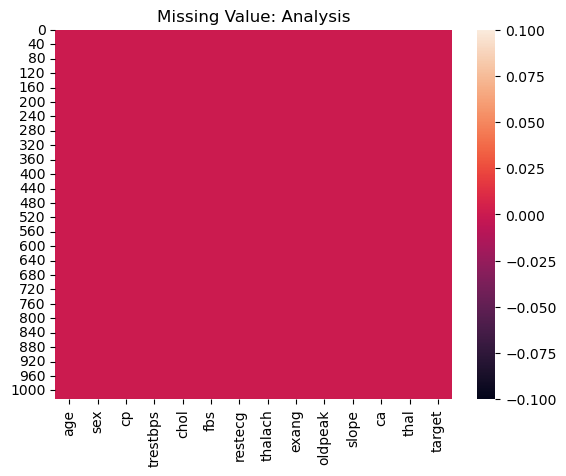

In [6]:
# Missing values
plt.title("Missing Value: Analysis")
sns.heatmap(df.isnull())
plt.show()

* Dataset is very clean.It is free from the Missing values 

In [7]:
# Datatypes of the datas in the dataframe 
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#### Corelation Analysis

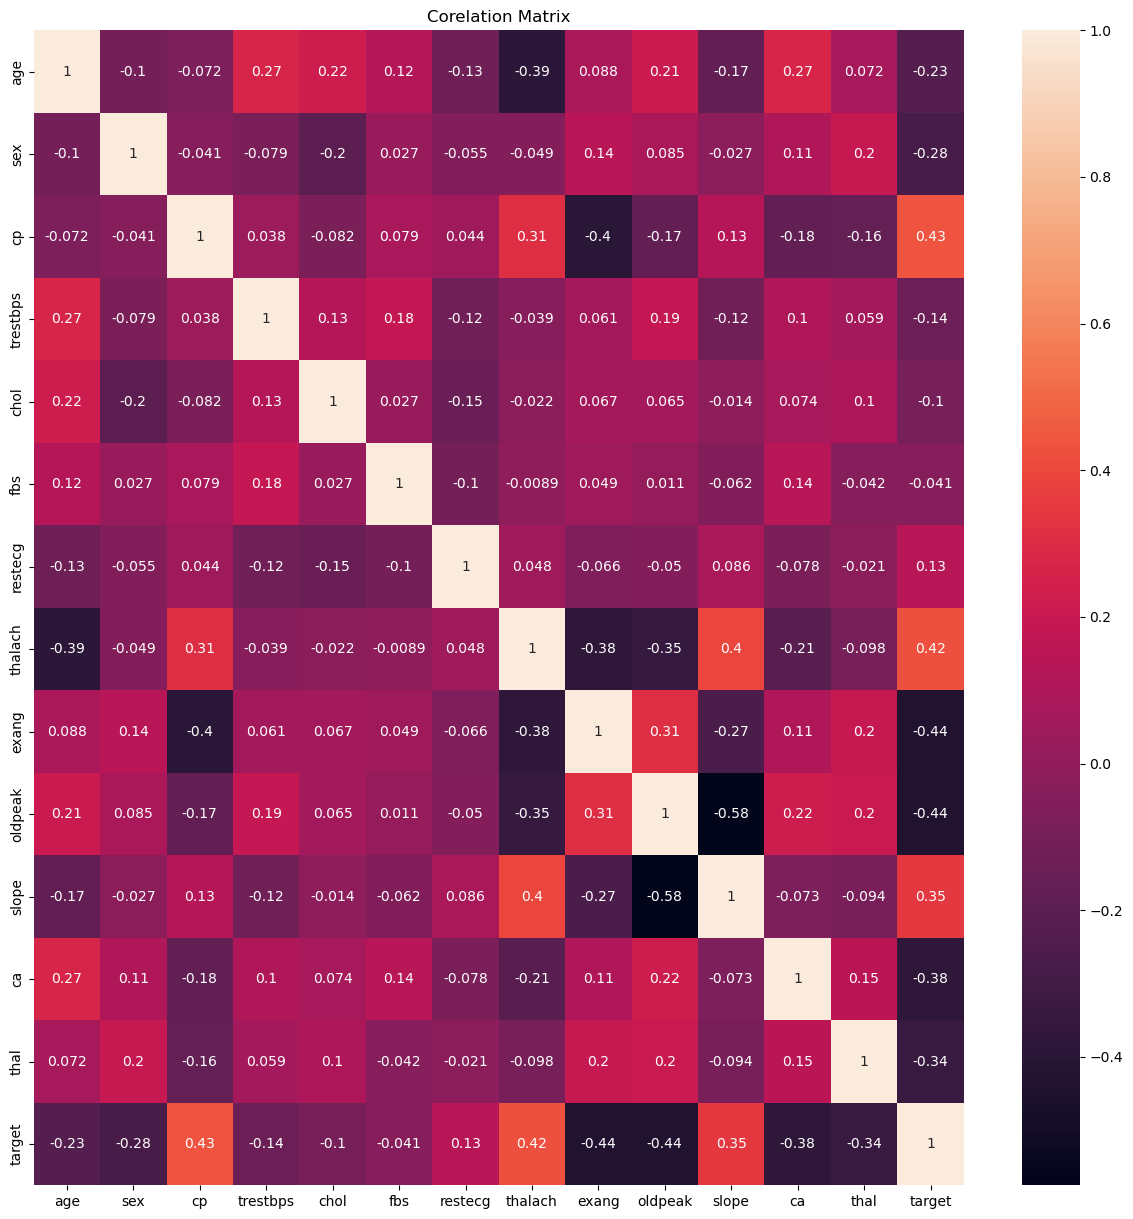

In [8]:
# Corelation Analysis 
plt.figure(figsize=(15,15))
plt.title("Corelation Matrix")
sns.heatmap(df.corr(),annot=True)
plt.show()

Relatively Highly Corelated features with target features are,
1. cp -> chest pain
2. exang  -> exercise induced angina
3. oldpeak -> ST depression induced by exercise relative to rest
4. talach -> Maximum heart rate achieved

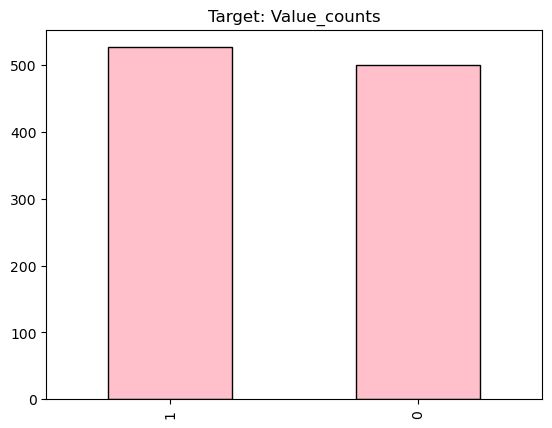

In [9]:
# Now lets check,whether the datset is balanced or not 
plt.title("Target: Value_counts")
df["target"].value_counts().plot(kind="bar",color="pink",edgecolor="k")
plt.show()

* The datset is balanced, because the target feature has almost each number of category.
* 1 represents person with heart desease and 0-represent person with no heart deasease

In [10]:
# Lets now identify the major difference between the values of person with heart desease and person without heart desease
No_heart_desease_df = df[df["target"] == 0]
Yes_heart_desease_df = df[df["target"] == 1]

In [11]:
# averge of the dataset value with person infected and not infected 
df.groupby("target").mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


* From the Analysis, it is clear that about the behaviour of the person with heart desease
1. cp value very higher
2. exercise induced angina very less
3. ST depression induced by exercise relative to rest very less
4. thalach(Maximum heart rate achieved) high

* Note: Exercise-induced angina, also known as effort-induced angina or stable angina, is a type of chest pain or discomfort that occurs when the heart muscle doesn't receive enough blood flow and oxygen during physical activity. It is often a symptom of underlying coronary artery disease (CAD).
* ST depression induced by exercise relative to rest : refers to a phenomenon observed on an electrocardiogram (ECG or EKG) during a stress test. This test is commonly known as an exercise stress test or treadmill test. The purpose of the test is to evaluate how the heart responds to physical activity, particularly in individuals suspected of having coronary artery disease (CAD).

#### Data Visualisation

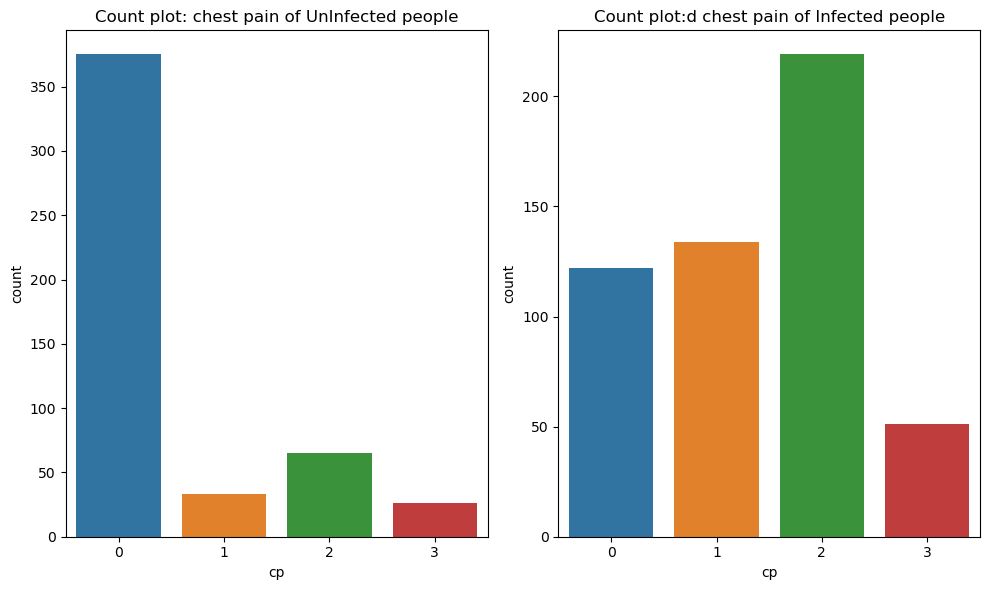

In [12]:
# lets visualise the distribution of the cp(chest pain) of the person with heart desease 
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Count plot: chest pain of UnInfected people")
sns.countplot(x="cp",data = No_heart_desease_df)
plt.subplot(1,2,2)
plt.title("Count plot:d chest pain of Infected people")
sns.countplot(x="cp",data = Yes_heart_desease_df)
plt.tight_layout()
plt.show()

* from the count plot, It is understood that, the person with high chest pain have the high chance of heart desease

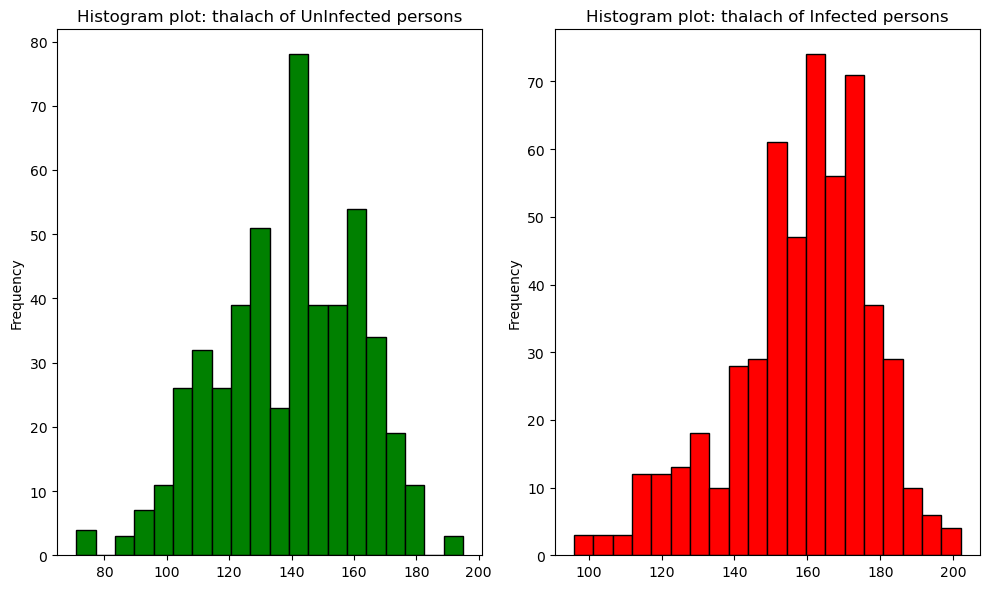

In [72]:
# talach -> Maximum heart beat achieved
# lets visualise the distribution of the thalach of the person with heart desease and without
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Histogram plot: thalach of UnInfected persons")
No_heart_desease_df["thalach"].plot(kind="hist",bins=20,color="g",edgecolor="k")
plt.subplot(1,2,2)
plt.title("Histogram plot: thalach of Infected persons")
Yes_heart_desease_df["thalach"].plot(kind="hist",bins=20,color="r",edgecolor="k")
plt.tight_layout()
plt.show()

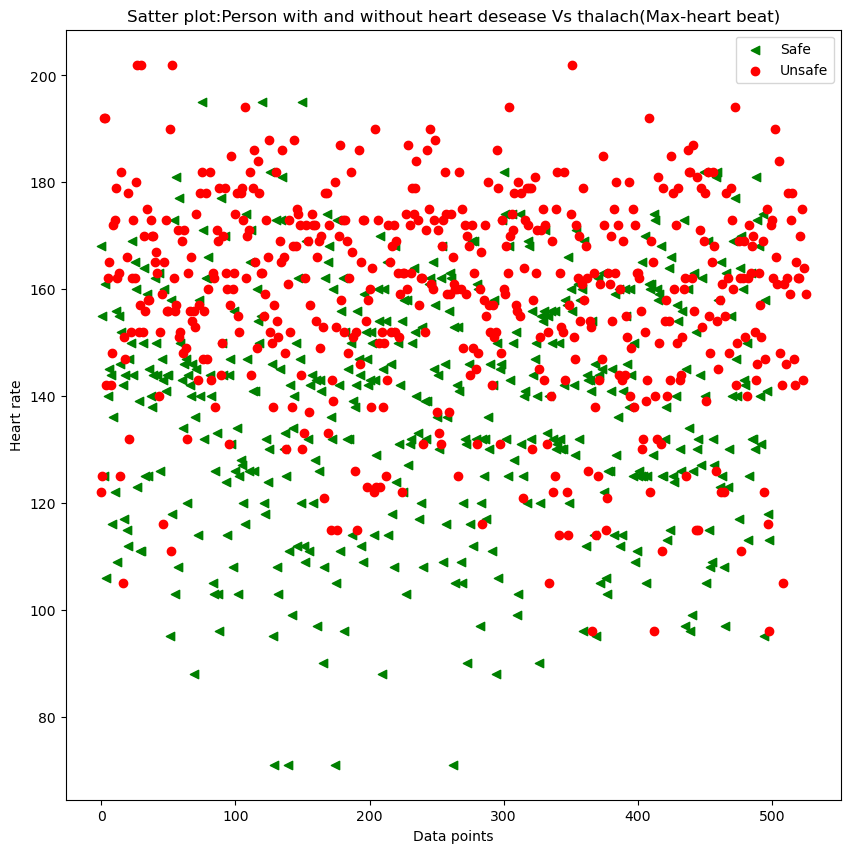

In [71]:
# Scatter plot representation: to understand the data point distribution
plt.figure(figsize=(10,10))
plt.title("Satter plot:Person with and without heart desease Vs thalach(Max-heart beat)")
plt.ylabel("Heart rate")
plt.xlabel("Data points")
plt.scatter(range(len(No_heart_desease_df)),No_heart_desease_df["thalach"],color="g",label="Safe",marker="<")
plt.scatter(range(len(Yes_heart_desease_df)),Yes_heart_desease_df["thalach"],color="r",label="Unsafe")
plt.legend()
plt.show()

* from the above figure it is clear that, person recorded with high heart beats have high chance of infected with heart desease

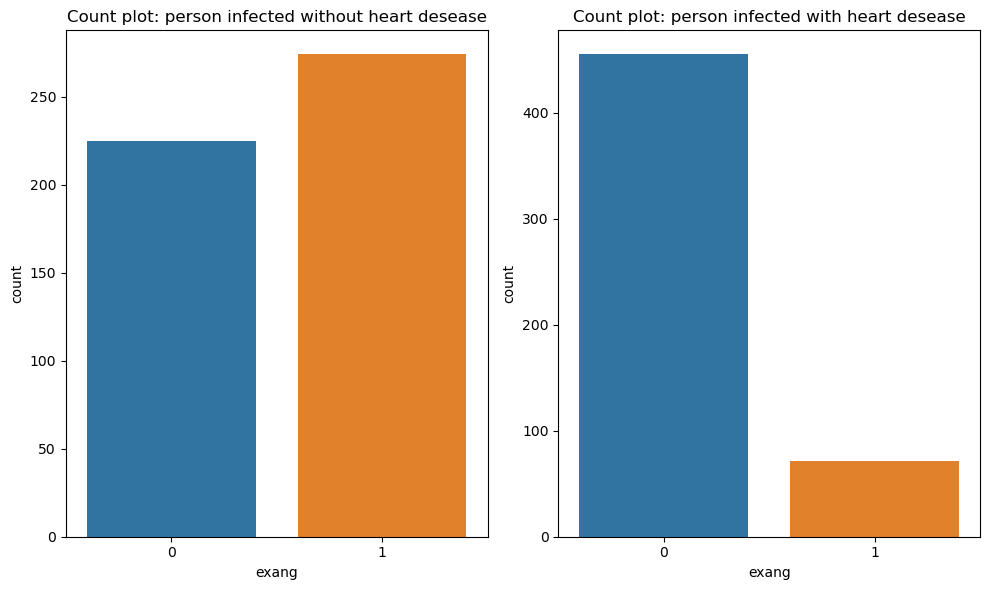

In [15]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Count plot: person infected without heart desease")
sns.countplot(x="exang",data = No_heart_desease_df)
plt.subplot(1,2,2)
plt.title("Count plot: person infected with heart desease")
sns.countplot(x="exang",data = Yes_heart_desease_df)
plt.tight_layout()
plt.show()

* individuals with exercise-induced angina actually have an increased likelihood of having coronary artery disease or other cardiovascular issues.
* so, 0 may be the indicative of person with exercise-induced angina

In [16]:
# Corelation with target feature 
df["exang"].corr(df["target"])

-0.4380285500558465

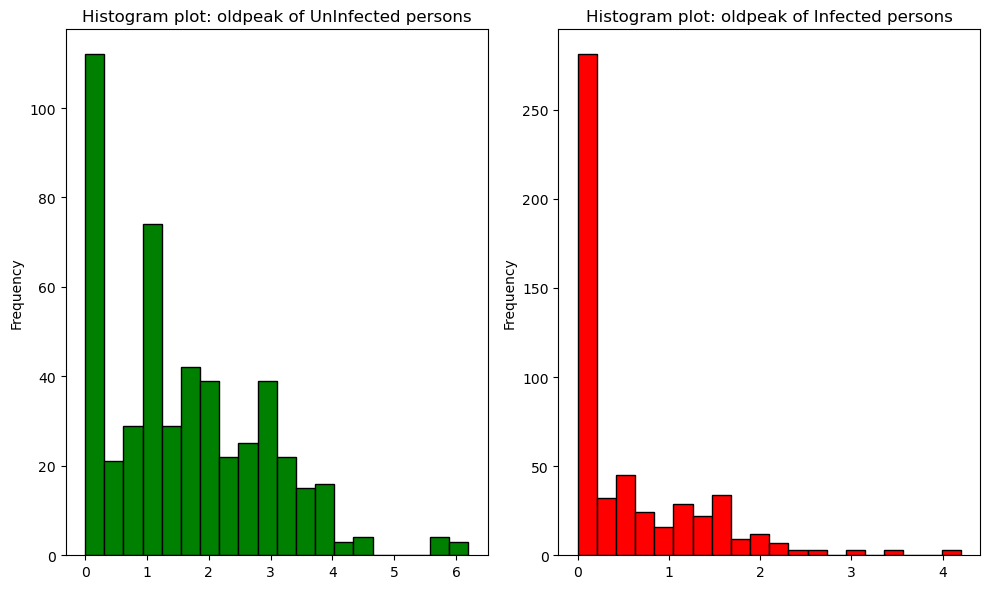

In [70]:
# ST depression induced by exercise relative to rest (oldpeak)
# Histogram: for understanding the distribution
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Histogram plot: oldpeak of UnInfected persons")
No_heart_desease_df["oldpeak"].plot(kind="hist",bins=20,color="g",edgecolor="k")
plt.subplot(1,2,2)
plt.title("Histogram plot: oldpeak of Infected persons")
Yes_heart_desease_df["oldpeak"].plot(kind="hist",bins=20,color="r",edgecolor="k")
plt.tight_layout()
plt.show()

In [18]:
Yes_heart_desease_df["oldpeak"].describe()

count    526.000000
mean       0.569962
std        0.771079
min        0.000000
25%        0.000000
50%        0.200000
75%        1.000000
max        4.200000
Name: oldpeak, dtype: float64

* from the distribution:it is understood that, very small value of oldpeak has a high probability of being heart desease

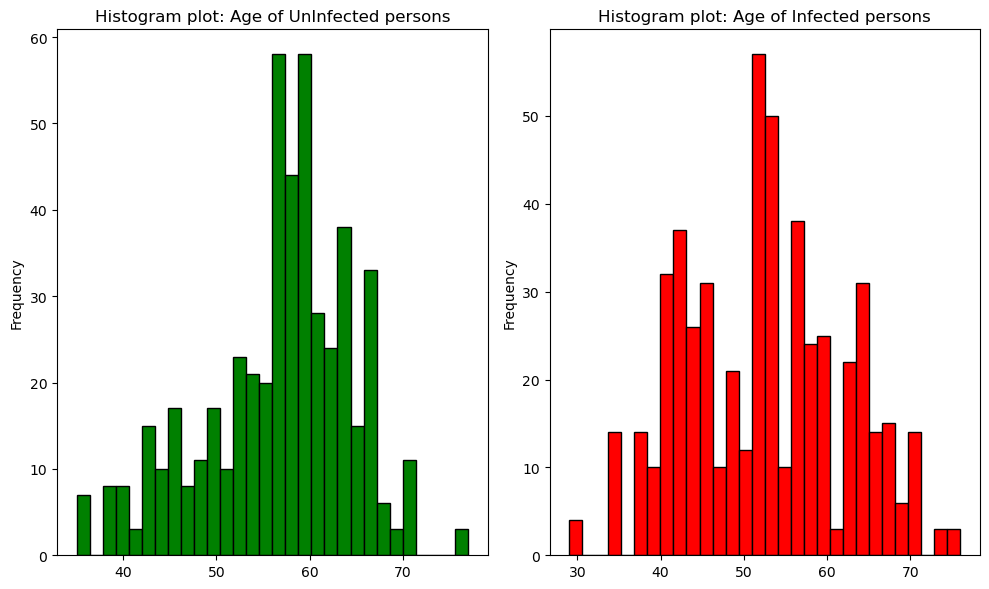

In [69]:
# Distribution of Age feature
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Histogram plot: Age of UnInfected persons")
No_heart_desease_df["age"].plot(kind="hist",bins=30,color="g",edgecolor="k")
plt.subplot(1,2,2)
plt.title("Histogram plot: Age of Infected persons")
Yes_heart_desease_df["age"].plot(kind="hist",bins=30,color="r",edgecolor="k")
plt.tight_layout()
plt.show()

* Age 40-50 has high chance of getting heart desease

#### Outlier Analysis

In [20]:
# Countinous features 
continous_features = []

for feature in df.columns:
    if df[feature].nunique() > 20:
        continous_features.append(feature)
continous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

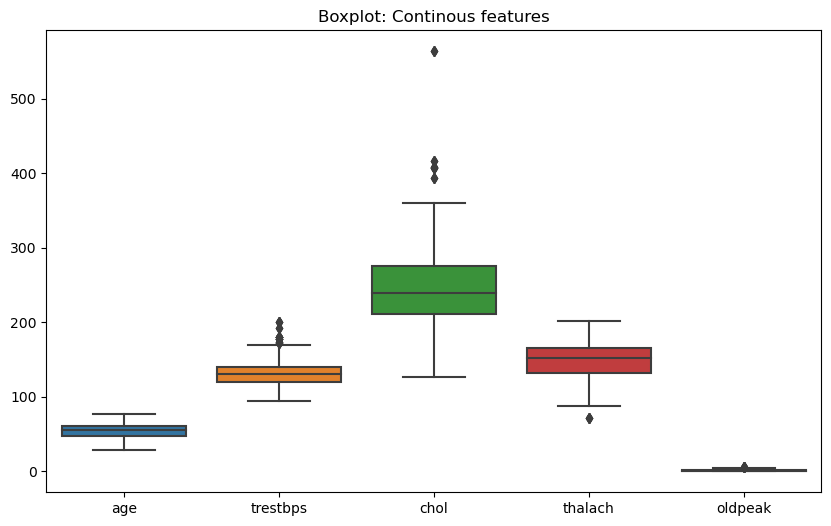

In [21]:
# Boxplot: Continous features
plt.figure(figsize=(10,6))
plt.title("Boxplot: Continous features")
sns.boxplot(data=df[continous_features])
plt.show()

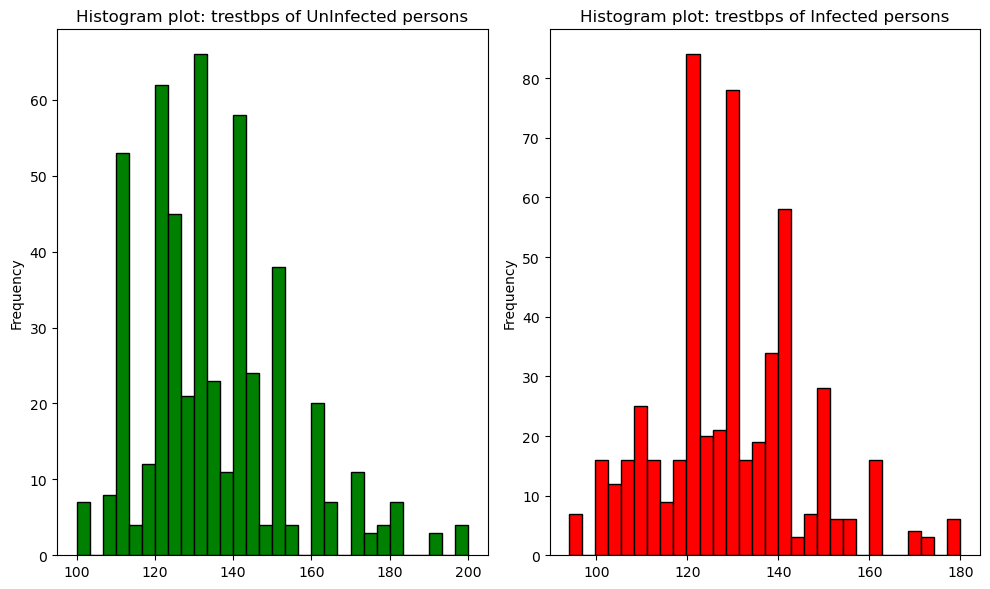

In [68]:
# Now lets, analyse the the resting blood pressure
# Distribution of blood pressure feature
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Histogram plot: trestbps of UnInfected persons")
No_heart_desease_df["trestbps"].plot(kind="hist",bins=30,color="g",edgecolor="k")
plt.subplot(1,2,2)
plt.title("Histogram plot: trestbps of Infected persons")
Yes_heart_desease_df["trestbps"].plot(kind="hist",bins=30,color="r",edgecolor="k")
plt.tight_layout()
plt.show()

In [23]:
df["trestbps"].corr(df["target"])

-0.13877173373730103

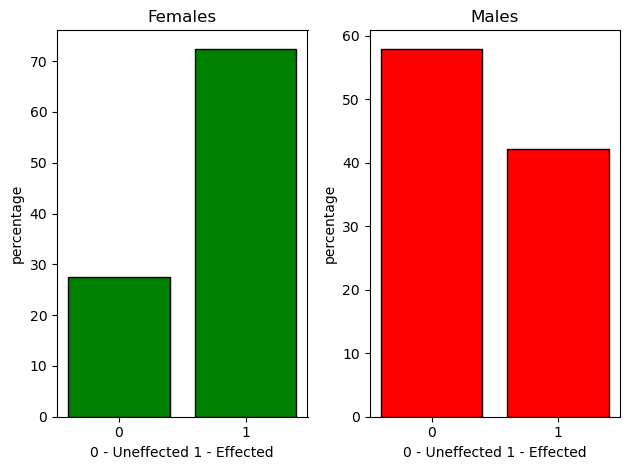

In [67]:
# Analyse the sex feature with the heart desease 
# 0 - Females and 1- males 
plt.subplot(1,2,1)
plt.title("Females")
plt.bar([1,0],100 * df["target"][df["sex"] == 0].value_counts()/len(df["target"][df["sex"] == 0]),color="g",edgecolor="k")
plt.xticks([1,0])
plt.ylabel("percentage")
plt.xlabel("0 - Uneffected 1 - Effected")
plt.subplot(1,2,2)
plt.title("Males")
plt.bar([0,1],100 * df["target"][df["sex"] == 1].value_counts()/len(df["target"][df["sex"] == 1]),color="r",edgecolor="k")
plt.xticks([0,1])
plt.ylabel("percentage")
plt.xlabel("0 - Uneffected 1 - Effected")
plt.tight_layout()
plt.show()

* Female are highly prone to heart desease than males.
* In females,More than 70% of the people are infected with heart desease

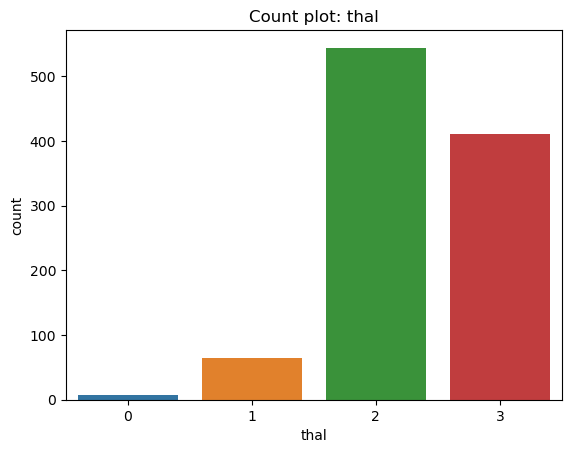

In [74]:
# Count plot: thal(thal: 0 = normal; 1 = fixed defect; 2 = reversable defect)
plt.title("Count plot: thal")
sns.countplot(x="thal",data = df)
plt.show()

* Both reversible and Non reversible defects are prone to heart desease

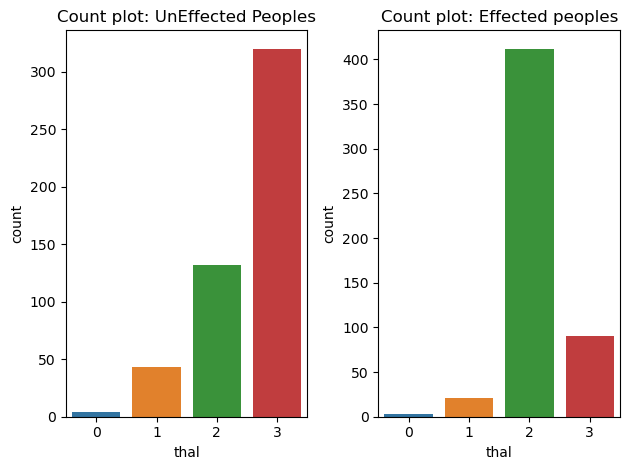

In [84]:
# Count plot: Effected and Non effected dataset
plt.subplot(1,2,1)
plt.title("Count plot: UnEffected Peoples")
sns.countplot(x="thal",data = No_heart_desease_df)
plt.subplot(1,2,2)
plt.title("Count plot: Effected peoples")
sns.countplot(x="thal",data = Yes_heart_desease_df)
plt.tight_layout()
plt.show()

* person with reversible defect have a high chance of heart desease
* Both reversible and irreversible defects observed in a thallium stress test are indicative of potential issues with blood flow to the heart, which can be associated with coronary artery disease or other cardiac conditions. However, the severity of the condition is not solely determined by whether the defect is reversible or irreversible.

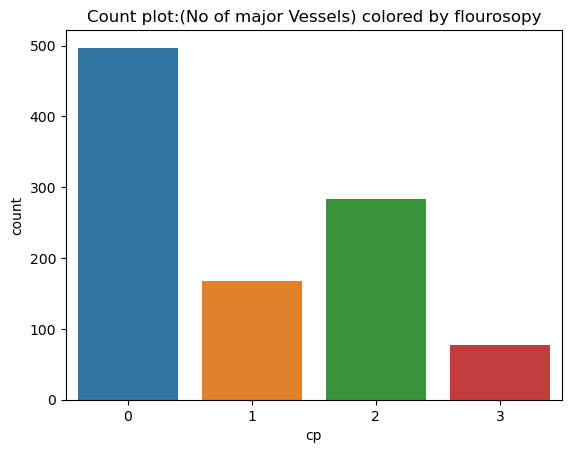

In [91]:
# Now lets, Analyse the no of major vessels(0-3)
plt.title("Count plot:(No of major Vessels) colored by flourosopy")
sns.countplot(x="cp",data = df)
plt.show()

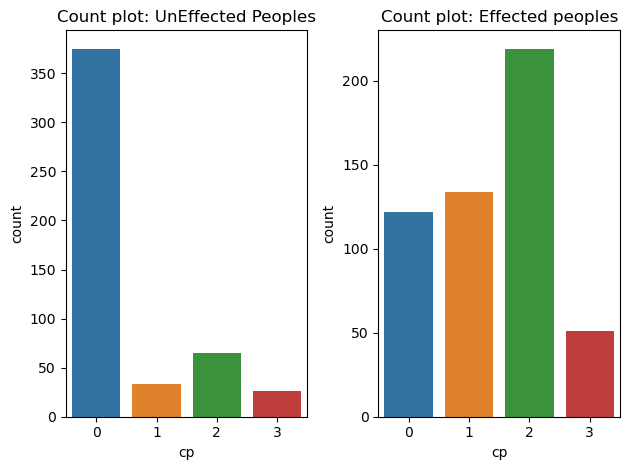

In [90]:
# Count plot: Effected and Non effected dataset
plt.subplot(1,2,1)
plt.title("Count plot: UnEffected Peoples")
sns.countplot(x="cp",data = No_heart_desease_df)
plt.subplot(1,2,2)
plt.title("Count plot: Effected peoples")
sns.countplot(x="cp",data = Yes_heart_desease_df)
plt.tight_layout()
plt.show()

* people with 2 Major vessels colored by flourosopy have high prone to heart desease.
* People with 0 Major vessels colored by flourosopy are Safe.

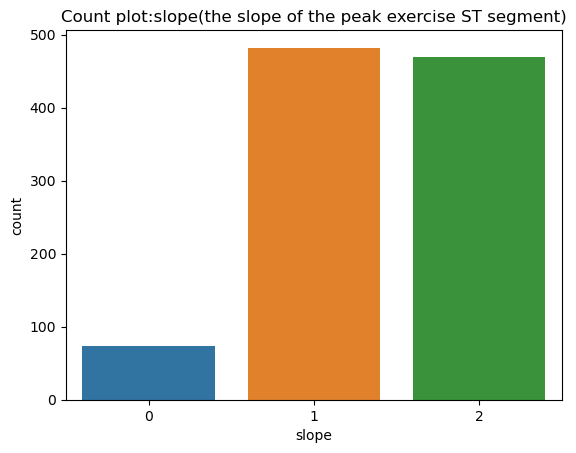

In [95]:
# Now lets analyse slope feature,
plt.title("Count plot:slope(the slope of the peak exercise ST segment)")
sns.countplot(x="slope",data = df)
plt.show()

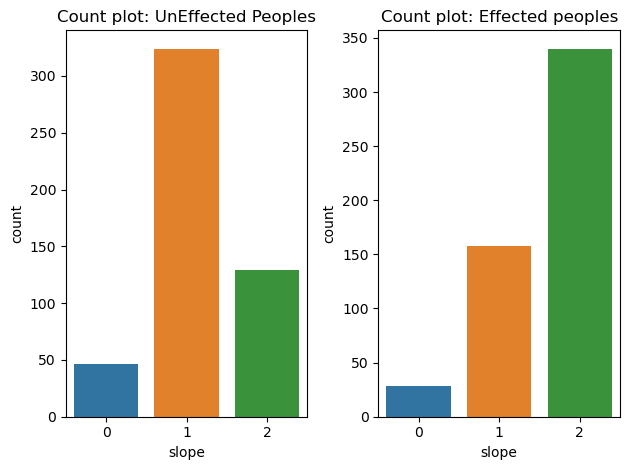

In [94]:
# Count plot: Effected and Non effected dataset
plt.subplot(1,2,1)
plt.title("Count plot: UnEffected Peoples")
sns.countplot(x="slope",data = No_heart_desease_df)
plt.subplot(1,2,2)
plt.title("Count plot: Effected peoples")
sns.countplot(x="slope",data = Yes_heart_desease_df)
plt.tight_layout()
plt.show()

* person with slope of the peak exercise ST segment value 2 have high prone to heart desease 